In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'

columns = ['Status', 'Duration', 'CreditHistory', 'Purpose', 'CreditAmount', 'Savings',
           'EmploymentSince', 'InstallmentRate', 'PersonalStatusSex', 'Debtors', 'ResidenceSince',
           'Property', 'Age', 'OtherInstallmentPlans', 'Housing', 'ExistingCredits', 'Job',
           'NumPeopleLiable', 'Telephone', 'ForeignWorker', 'Credit']

df = pd.read_csv(url, sep=' ', names=columns)

In [4]:
df['Credit'] = df['Credit'].map({1: 1, 2: 0})

cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [5]:
X = df.drop('Credit', axis=1)
y = df['Credit']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [9]:
def evaluate_model(y_true, y_pred, name):
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

In [10]:
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")


Model: Logistic Regression
Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.49      0.57        59
           1       0.81      0.90      0.85       141

    accuracy                           0.78       200
   macro avg       0.74      0.70      0.71       200
weighted avg       0.77      0.78      0.77       200

Confusion Matrix:
 [[ 29  30]
 [ 14 127]]

Model: Random Forest
Accuracy: 0.805
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.53      0.61        59
           1       0.82      0.92      0.87       141

    accuracy                           0.81       200
   macro avg       0.78      0.72      0.74       200
weighted avg       0.80      0.81      0.79       200

Confusion Matrix:
 [[ 31  28]
 [ 11 130]]


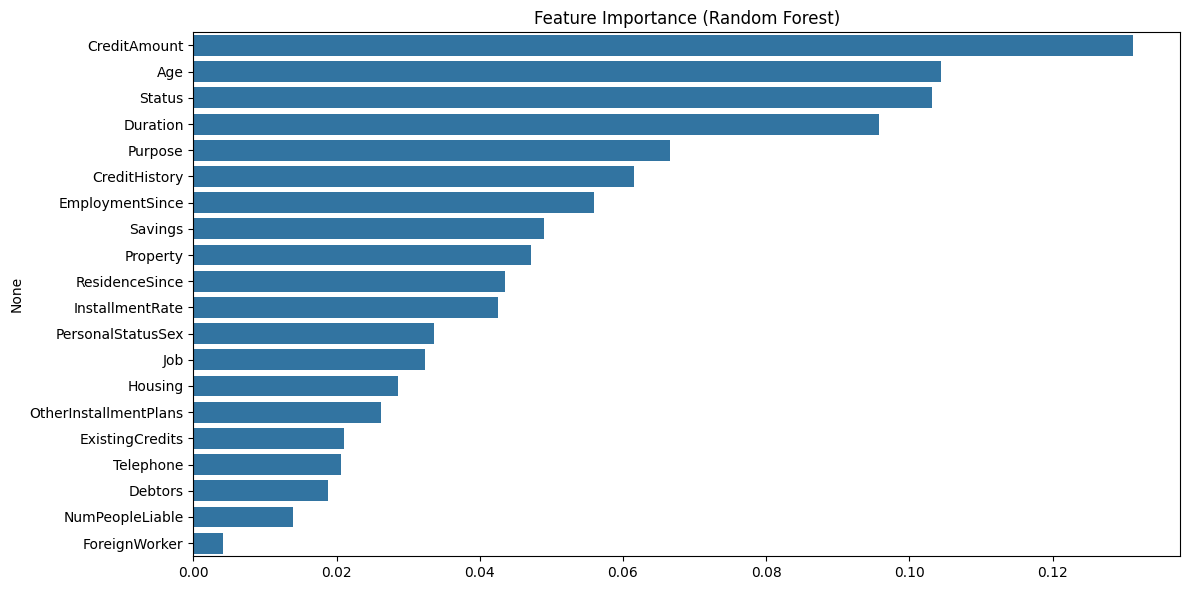

In [11]:
importances = rf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()